# Project 2 : Meteorology Instrument Package

### Importing Data via M2M

In [1]:
import numpy as np
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt
import requests
import pytz

USERNAME ='OOIAPI-WHNOJE4PQ8J7YN'
TOKEN= 'I3ZVNY6GD7'
apiurl = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/'

### Converting NTP to PST

In [2]:
import datetime
ntp_epoch=datetime.datetime(1900,1,1)
unix_epoch=datetime.datetime(1970,1,1)
ntp_delta=(unix_epoch-ntp_epoch).total_seconds()
pst_delta=8*3600

def ntp_seconds_to_datetime(ntp_seconds):
    timestamp = datetime.datetime.utcfromtimestamp(ntp_seconds-ntp_delta).replace(microsecond=0)
    utc_timezone=pytz.timezone('UTC')
    pst_timezone=pytz.timezone('US/Pacific')
    time=utc_timezone.localize(timestamp).astimezone(pst_timezone)
    return time

### Importing One Year of Data From Both Locations

In [3]:
dataurl = ['https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/CE02SHSM/SBD11/06-METBKA000/telemetered/metbk_a_dcl_instrument?beginDT=2019-01-01T00:31:20.712Z&endDT=2019-12-31T00:31:20.712Z&limit=1000',
                   'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/CE04OSSM/SBD11/06-METBKA000/telemetered/metbk_a_dcl_instrument?beginDT=2019-01-01T04:33:58.629Z&endDT=2019-12-31T04:33:58.629Z&limit=1000']

### Appending Data from Import to Empty Arrays

- Data for wind is given in different directions, but we want the magnitude
- Datetime function used to transform our time measurements
- Data URL value differentiates between Oregon Shelf and Oregon Offshort

In [4]:
oregonshelf_v=[]
oregonshelf_r=[]
oregonoff_v=[]
oregonoff_r=[]

datalength = range(len(dataurl))

for i in datalength:
    r=requests.get(dataurl[i],auth=(USERNAME,TOKEN))
    data=r.json()
    t=[]
    v=[]
    r=[]
    for j in range(len(data)):
        t.append(ntp_seconds_to_datetime(data[j]['time']))
        windmag=np.sqrt((np.square(data[j]['northward_wind_velocity']))+(np.square(data[j]['eastward_wind_velocity'])))
        v.append(windmag)
        r.append(data[j]['precipitation'])
        if i==0:
            oregonshelf_v.append(windmag)
            oregonshelf_r.append(data[j]['precipitation'])
        elif i==1:
            oregonoff_v.append(windmag)
            oregonoff_r.append(data[j]['precipitation'])

### Filtering Out Values That Are Not Numbers

In [5]:
v=np.asarray(v)
nans=isnan(v)
v[nans]=0

### 4) Determining Areas of Wind and Rain For Oregon Shelf

1. No wind or rain
2. Wind and no rain
3. Rain and no wind
4. Wind

In [6]:
t1=[]
v1=[]
r1=[]
t2=[]
v2=[]
r2=[]
t3=[]
v3=[]
r3=[]
t4=[]
v4=[]
r4=[]

timelength=range(len(t))
avgv=mean(v)
avgr=mean(r)

for i in timelength:
    if oregonshelf_v[i]/avgv < 0.3 and oregonshelf_r[i]/avgr < 0.3:
        t1.append(t[i])
        v1.append(v[i]/avgv)
        r1.append(r[i]/avgr)
    elif oregonshelf_v[i]/avgv >= 0.3 and oregonshelf_r[i]/avgr < 0.3:
        t2.append(t[i])
        v2.append(v[i]/avgv)
        r2.append(r[i]/avgr)
    elif oregonshelf_v[i]/avgv < 0.3 and oregonshelf_r[i]/avgr >= 0.3:
        t3.append(t[i])
        v3.append(v[i]/avgv)
        r3.append(r[i]/avgr)
    elif oregonshelf_v[i]/avgv >= 0.3 and oregonshelf_r[i]/avgr >= 0.3:
        t4.append(t[i])
        v4.append(v[i]/avgv)
        r4.append(r[i]/avgr)

### 4) Plotting Wind/Rain and Time For Oregon Shelf

- Velocity and rain values were normalized

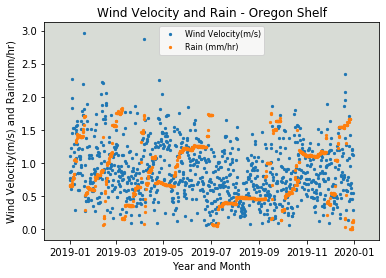

In [7]:
pd.plotting.register_matplotlib_converters()
plt.scatter(t,oregonshelf_v/avgv,s=5,label='Wind Velocity(m/s)')
plt.scatter(t,oregonshelf_r/avgr,s=5,label='Rain (mm/hr)')
plt.title('Wind Velocity and Rain - Oregon Shelf')
plt.xlabel('Year and Month')
plt.ylabel('Wind Velocity(m/s) and Rain(mm/hr)')
plt.legend(loc='upper center',prop={'size': 8})
ax=plt.gca()
ax.set_facecolor('xkcd:light grey')
plt.show();

### 4) Plotting Cases of Wind and Rain for Oregon Shelf

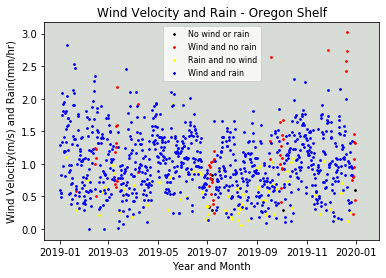

In [8]:
pd.plotting.register_matplotlib_converters()
plt.scatter(t1,v1,s=3,label='No wind or rain', color='black')
plt.scatter(t2,v2,s=3,label='Wind and no rain', color='red')
plt.scatter(t3,v3,s=3,label='Rain and no wind', color='yellow')
plt.scatter(t4,v4,s=3,label='Wind and rain', color='blue')
plt.title('Wind Velocity and Rain - Oregon Shelf')
plt.xlabel('Year and Month')
plt.ylabel('Wind Velocity(m/s) and Rain(mm/hr)')
plt.legend(loc='upper center',prop={'size': 8});
ax=plt.gca()
ax.set_facecolor('xkcd:light grey')

### 4) Plotting Wind/Rain and Time For Oregon Offshore

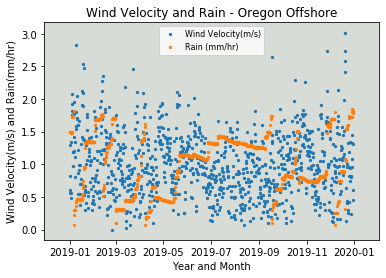

In [9]:
pd.plotting.register_matplotlib_converters()
plt.scatter(t,oregonoff_v/avgv,s=5,label='Wind Velocity(m/s)')
plt.scatter(t,oregonoff_r/avgr,s=5,label='Rain (mm/hr)')
plt.title('Wind Velocity and Rain - Oregon Offshore')
plt.xlabel('Year and Month')
plt.ylabel('Wind Velocity(m/s) and Rain(mm/hr)')
plt.legend(loc='upper center',prop={'size': 8})
ax=plt.gca()
ax.set_facecolor('xkcd:light grey')

### 4) Determining Areas of Wind and Rain For Oregon Offshore

In [10]:
t1=[]
v1=[]
r1=[]
t2=[]
v2=[]
r2=[]
t3=[]
v3=[]
r3=[]
t4=[]
v4=[]
r4=[]

timelength=range(len(t))
avgv=mean(v)
avgr=mean(r)

for i in timelength:
    if oregonoff_v[i]/avgv < 0.3 and oregonoff_r[i]/avgr < 0.3:
        t1.append(t[i])
        v1.append(v[i]/avgv)
        r1.append(r[i]/avgr)
    elif oregonoff_v[i]/avgv >= 0.3 and oregonoff_r[i]/avgr < 0.3:
        t2.append(t[i])
        v2.append(v[i]/avgv)
        r2.append(r[i]/avgr)
    elif oregonoff_v[i]/avgv < 0.3 and oregonoff_r[i]/avgr >= 0.3:
        t3.append(t[i])
        v3.append(v[i]/avgv)
        r3.append(r[i]/avgr)
    elif oregonoff_v[i]/avgv >= 0.3 and oregonoff_r[i]/avgr >= 0.3:
        t4.append(t[i])
        v4.append(v[i]/avgv)
        r4.append(r[i]/avgr)

### 4) Plotting Cases of Wind and Rain for Oregon Offshore

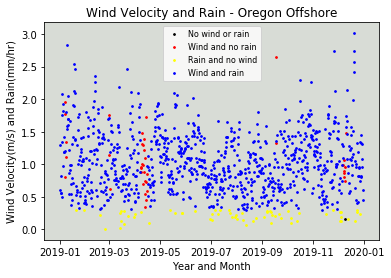

In [11]:
pd.plotting.register_matplotlib_converters()
plt.scatter(t1,v1,s=3,label='No wind or rain', color='black')
plt.scatter(t2,v2,s=3,label='Wind and no rain', color='red')
plt.scatter(t3,v3,s=3,label='Rain and no wind', color='yellow')
plt.scatter(t4,v4,s=3,label='Wind and rain', color='blue')
plt.title('Wind Velocity and Rain - Oregon Offshore')
plt.xlabel('Year and Month')
plt.ylabel('Wind Velocity(m/s) and Rain(mm/hr)')
plt.legend(loc='upper center',prop={'size': 8});
ax=plt.gca()
ax.set_facecolor('xkcd:light grey')

### Plotting Relationship of Wind Velocity

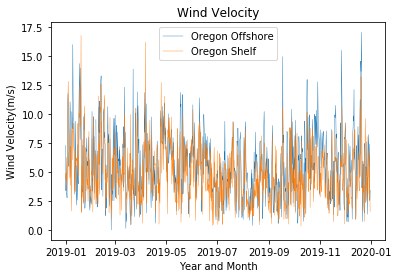

In [12]:
pd.plotting.register_matplotlib_converters()
plt.plot(t,oregonoff_v,lw=0.4,label='Oregon Offshore');
plt.plot(t,oregonshelf_v,lw=0.4,label='Oregon Shelf');
plt.title('Wind Velocity')
plt.xlabel('Year and Month')
plt.ylabel('Wind Velocity(m/s)')
plt.legend();

### Plotting Relationship of Rain 

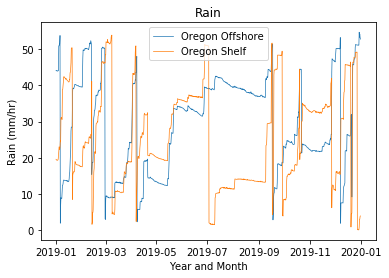

In [13]:
pd.plotting.register_matplotlib_converters()
plt.plot(t,oregonoff_r,lw=0.7,label='Oregon Offshore');
plt.plot(t,oregonshelf_r,lw=0.7,label='Oregon Shelf');
plt.title('Rain')
plt.xlabel('Year and Month')
plt.ylabel('Rain (mm/hr)')
plt.legend();

### 5) Correlation of Wind Velocity

- We must first remove all non number values from the velocity datasets
- Then find the covariance values to find correlation values

In [14]:
oregonoff_v = np.asarray(oregonoff_v)
nans=isnan(oregonoff_v)
oregonoff_v[nans]=0
oregonshelf_v = np.asarray(oregonshelf_v)
nans=isnan(oregonshelf_v)
oregonshelf_v[nans]=0

lag=np.arange(-len(oregonoff_v)+1,len(oregonoff_v))
covar=np.correlate(oregonoff_v-oregonoff_v.mean(),oregonshelf_v-oregonshelf_v.mean(),mode='full')
cor=covar/(len(oregonoff_v)*oregonoff_v.std()*oregonshelf_v.std())

### 5) Plotting Correlation Values of Wind Velocity


Maximum correlation is found at lag value 0
This is a lag of 0.0 days
The maximum correlation value is 0.6314010061301172


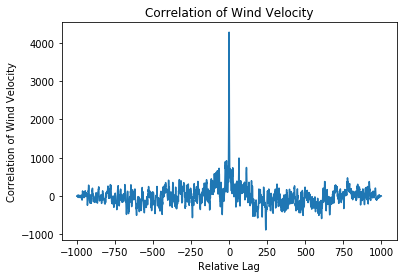

In [15]:
pd.plotting.register_matplotlib_converters()
plt.plot(lag,covar,label='Correlation of Wind Velocity');
plt.title('Correlation of Wind Velocity')
plt.xlabel('Relative Lag')
plt.ylabel('Correlation of Wind Velocity');

print()
maxlag=lag[np.argmax(cor)]
print("Maximum correlation is found at lag value %a" % maxlag)
lagindays = (maxlag/len(t))*365
print("This is a lag of %a days" % lagindays)
maxcor = np.max(cor)
print("The maximum correlation value is %a" % maxcor)

### 6) Correlation of Rain

In [16]:
oregonoff_r = np.asarray(oregonoff_r)
nans=isnan(oregonoff_r)
oregonoff_r[nans]=0
oregonshelf_r = np.asarray(oregonshelf_r)
nans=isnan(oregonshelf_r)
oregonshelf_r[nans]=0

lag=np.arange(-len(oregonoff_r)+1,len(oregonoff_r))
covar=np.correlate(oregonoff_r-oregonoff_r.mean(),oregonshelf_r-oregonshelf_r.mean(),mode='full')
cor=covar/(len(oregonoff_r)*oregonoff_r.std()*oregonshelf_r.std())

### 6) Plotting Correlation Values of Rain


Maximum correlation is found at lag value 341
This is a lag of 124.0 days
The maximum correlation value is 0.3515930061267975


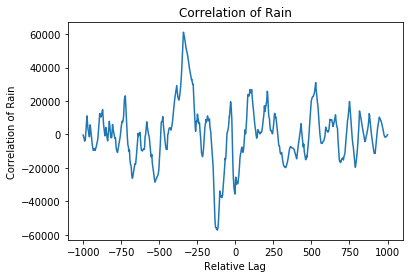

In [17]:
pd.plotting.register_matplotlib_converters()
plt.plot(lag,covar,label='Correlation of Rain');
plt.title('Correlation of Rain')
plt.xlabel('Relative Lag')
plt.ylabel('Correlation of Rain');

print()
maxlag=abs(lag[np.argmax(cor)])
print("Maximum correlation is found at lag value %a" % maxlag)
lagindays = round(abs((maxlag/len(t))*365),0)
print("This is a lag of %a days" % lagindays)
maxcor = np.max(cor)
print("The maximum correlation value is %a" % maxcor)

### 8) Monthly Average of Wind Speed - Oregon Shelf

Splitting the array data into 12 subarrays, then calling the average of each for the 12 months

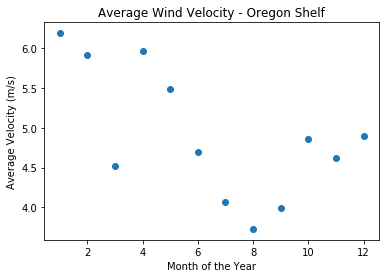

In [18]:
splitoregonshelf_v=np.array_split(oregonshelf_v,12);
m1= mean(splitoregonshelf_v[0]);
m2= mean(splitoregonshelf_v[1]);
m3= mean(splitoregonshelf_v[2]);
m4= mean(splitoregonshelf_v[3]);
m5= mean(splitoregonshelf_v[4]);
m6= mean(splitoregonshelf_v[5]);
m7= mean(splitoregonshelf_v[6]);
m8= mean(splitoregonshelf_v[7]);
m9= mean(splitoregonshelf_v[8]);
m10= mean(splitoregonshelf_v[9]);
m11= mean(splitoregonshelf_v[10]);
m12= mean(splitoregonshelf_v[11]);
shelfvavg=np.zeros((12,), dtype=float)
shelfvavg[0]=m1
shelfvavg[1]=m2
shelfvavg[2]=m3
shelfvavg[3]=m4
shelfvavg[4]=m5
shelfvavg[5]=m6
shelfvavg[6]=m7
shelfvavg[7]=m8
shelfvavg[8]=m9
shelfvavg[9]=m10
shelfvavg[10]=m11
shelfvavg[11]=m12
t=np.arange(1,13,1);
plt.scatter(t,shelfvavg)
plt.title('Average Wind Velocity - Oregon Shelf');
plt.xlabel('Month of the Year');
plt.ylabel('Average Velocity (m/s)');

### 8) Monthly Average of Wind Speed - Oregon Offshore

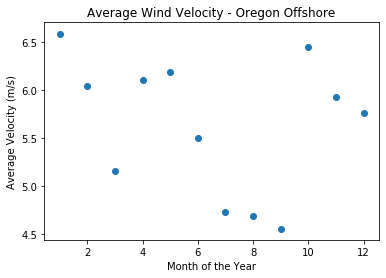

In [19]:
splitoregonoff_v=np.array_split(oregonoff_v,12);
m1= mean(splitoregonoff_v[0]);
m2= mean(splitoregonoff_v[1]);
m3= mean(splitoregonoff_v[2]);
m4= mean(splitoregonoff_v[3]);
m5= mean(splitoregonoff_v[4]);
m6= mean(splitoregonoff_v[5]);
m7= mean(splitoregonoff_v[6]);
m8= mean(splitoregonoff_v[7]);
m9= mean(splitoregonoff_v[8]);
m10= mean(splitoregonoff_v[9]);
m11= mean(splitoregonoff_v[10]);
m12= mean(splitoregonoff_v[11]);
offshorevavg=np.zeros((12,), dtype=float)
offshorevavg[0]=m1
offshorevavg[1]=m2
offshorevavg[2]=m3
offshorevavg[3]=m4
offshorevavg[4]=m5
offshorevavg[5]=m6
offshorevavg[6]=m7
offshorevavg[7]=m8
offshorevavg[8]=m9
offshorevavg[9]=m10
offshorevavg[10]=m11
offshorevavg[11]=m12
t=np.arange(1,13,1);
plt.scatter(t,offshorevavg)
plt.title('Average Wind Velocity - Oregon Offshore');
plt.xlabel('Month of the Year');
plt.ylabel('Average Velocity (m/s)');

### 8) Combining Wind Speed Average Plots

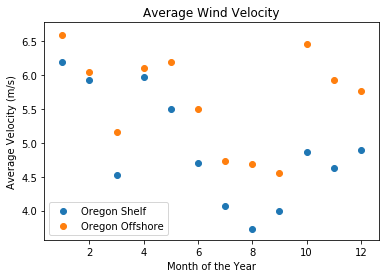

In [20]:
plt.scatter(t,shelfvavg,label='Oregon Shelf');
plt.scatter(t,offshorevavg,label='Oregon Offshore');
plt.legend()
plt.title('Average Wind Velocity');
plt.xlabel('Month of the Year');
plt.ylabel('Average Velocity (m/s)');

### 8) Monthly Average of Rain - Oregon Shelf

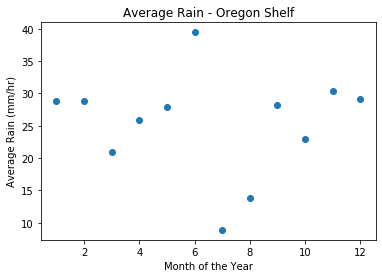

In [21]:
splitoregonshelf_r=np.array_split(oregonshelf_r,12);
m1= mean(splitoregonshelf_r[0]);
m2= mean(splitoregonshelf_r[1]);
m3= mean(splitoregonshelf_r[2]);
m4= mean(splitoregonshelf_r[3]);
m5= mean(splitoregonshelf_r[4]);
m6= mean(splitoregonshelf_r[5]);
m7= mean(splitoregonshelf_r[6]);
m8= mean(splitoregonshelf_r[7]);
m9= mean(splitoregonshelf_r[8]);
m10= mean(splitoregonshelf_r[9]);
m11= mean(splitoregonshelf_r[10]);
m12= mean(splitoregonshelf_r[11]);
shelfravg=np.zeros((12,), dtype=float)
shelfravg[0]=m1
shelfravg[1]=m2
shelfravg[2]=m3
shelfravg[3]=m4
shelfravg[4]=m5
shelfravg[5]=m6
shelfravg[6]=m7
shelfravg[7]=m8
shelfravg[8]=m9
shelfravg[9]=m10
shelfravg[10]=m11
shelfravg[11]=m12
t=np.arange(1,13,1);
plt.scatter(t,shelfravg)
plt.title('Average Rain - Oregon Shelf');
plt.xlabel('Month of the Year');
plt.ylabel('Average Rain (mm/hr)');

### 8) Monthly Average of Rain - Oregon Offshore

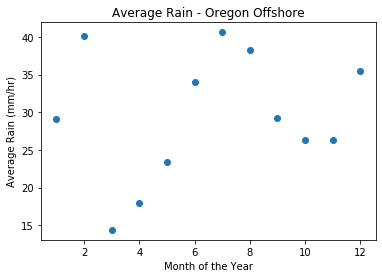

In [23]:
splitoregonoff_r=np.array_split(oregonoff_r,12);
m1= mean(splitoregonoff_r[0]);
m2= mean(splitoregonoff_r[1]);
m3= mean(splitoregonoff_r[2]);
m4= mean(splitoregonoff_r[3]);
m5= mean(splitoregonoff_r[4]);
m6= mean(splitoregonoff_r[5]);
m7= mean(splitoregonoff_r[6]);
m8= mean(splitoregonoff_r[7]);
m9= mean(splitoregonoff_r[8]);
m10= mean(splitoregonoff_r[9]);
m11= mean(splitoregonoff_r[10]);
m12= mean(splitoregonoff_r[11]);
offshoreravg=np.zeros((12,), dtype=float)
offshoreravg[0]=m1
offshoreravg[1]=m2
offshoreravg[2]=m3
offshoreravg[3]=m4
offshoreravg[4]=m5
offshoreravg[5]=m6
offshoreravg[6]=m7
offshoreravg[7]=m8
offshoreravg[8]=m9
offshoreravg[9]=m10
offshoreravg[10]=m11
offshoreravg[11]=m12
t=np.arange(1,13,1);
plt.scatter(t,offshoreravg)
plt.title('Average Rain - Oregon Offshore');
plt.xlabel('Month of the Year');
plt.ylabel('Average Rain (mm/hr)');

### 8) Combining Rain Average Plots

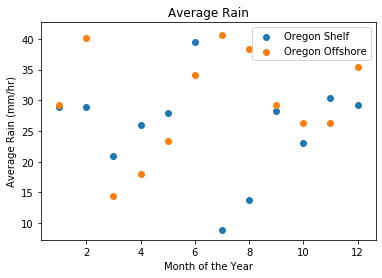

In [24]:
plt.scatter(t,shelfravg,label='Oregon Shelf');
plt.scatter(t,offshoreravg,label='Oregon Offshore');
plt.legend()
plt.title('Average Rain');
plt.xlabel('Month of the Year');
plt.ylabel('Average Rain (mm/hr)');